# ITU-ML5G-PS-005-KDDI Feature Importance Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
cd /content/drive/MyDrive/gakusai/master/ITU-ML5G-PS-005-KDDI-UT-NakaoLab-AI

# Data Load and Preprocess

In [1]:
import gc
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor as RFR
from tools.preprocessing import Processor
import os
import matplotlib.pyplot as plt
import pickle

In [2]:
train_0 = pd.read_csv('data/ML5G-PS-005_train_0.csv', index_col=0, header=0)
train_1 = pd.read_csv('data/ML5G-PS-005_train_1.csv', index_col=0, header=0)
train_2 = pd.read_csv('data/ML5G-PS-005_train_2.csv', index_col=0, header=0)
train_3 = pd.read_csv('data/ML5G-PS-005_train_3.csv', index_col=0, header=0)
train_4 = pd.read_csv('data/ML5G-PS-005_train_4.csv', index_col=0, header=0)
train_5 = pd.read_csv('data/ML5G-PS-005_train_5.csv', index_col=0, header=0)
train_data = pd.concat([train_0, train_1, train_2, train_3, train_4, train_5])
del train_0, train_1, train_2, train_3, train_4, train_5

test_0 = pd.read_csv('data/ML5G-PS-005_test_0.csv', index_col=0, header=0)
test_1 = pd.read_csv('data/ML5G-PS-005_test_1.csv', index_col=0, header=0)
test_2 = pd.read_csv('data/ML5G-PS-005_test_2.csv', index_col=0, header=0)
test_data = pd.concat([test_0, test_1, test_2])
del test_0, test_1, test_2
gc.collect()

0

In [3]:
preprocessor = Processor(train_data, test_data)

In [4]:
X, Y, test_X, test_Y = preprocessor.get_removed_data()
test_labels = preprocessor.test_label.values

In [23]:
X = X.drop('smf.smf.app.five-g.SM.PduSessionCreationFailNSI', axis=1)
test_X = test_X.drop('smf.smf.app.five-g.SM.PduSessionCreationFailNSI', axis=1)

# Random Forest training

In [38]:
rg = RFR(n_jobs=-1,
         random_state=0,
         n_estimators=30,
         min_samples_split=50,
         max_depth=25)

In [39]:
rg.fit(X, Y)

RandomForestRegressor(max_depth=25, min_samples_split=50, n_estimators=30,
                      n_jobs=-1, random_state=0)

In [40]:
rg.score(test_X, test_Y)

0.9694267671245709

In [41]:
predicted = rg.predict(test_X)

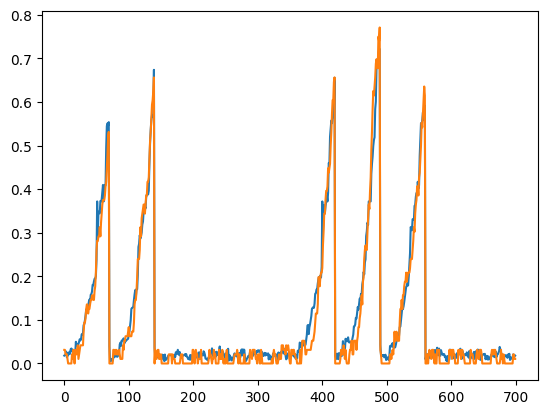

In [42]:
plt.plot(predicted[-1400:-700])
plt.plot(test_Y.values[-1400:-700])

# Visualize Feature Importance

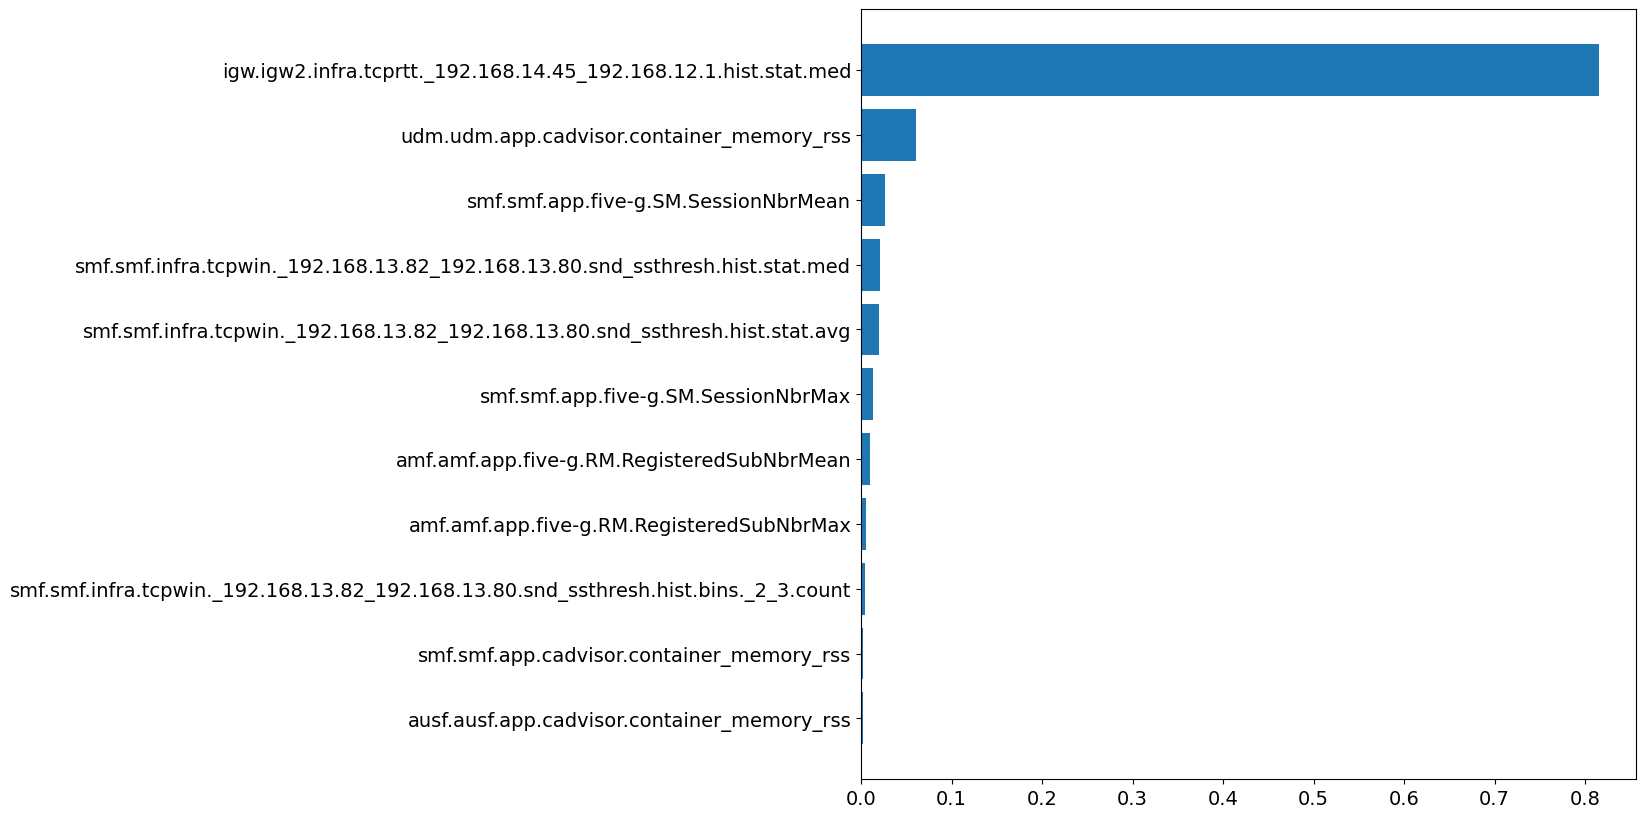

In [32]:
feature = rg.feature_importances_
label = X.columns[feature>0.001]
feature = feature[feature>0.001]
indices = np.argsort(feature)[feature>0.001]

fig = plt.figure(figsize=(10,10))
plt.barh(range(len(feature)),feature[indices])
plt.yticks(range(len(feature)), label[indices], fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [45]:
feature = rg.feature_importances_
with open('data/feature_importance.pkl', 'wb') as f:
  pickle.dump(feature, f)